In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
from numpy import (linspace, sin, cos, pi)
from numpy.fft import rfft, rfftfreq
from sklearn.decomposition import FastICA

In [2]:
len_n = np.array([100, 500, 1000, 1500, 3000, 8000])

mu, sigma = 0, 1
a0 = 1
a1 = 0.8
a2 = 0.5
w0 = 0.1815
w1 = 0.1787
w2 = 0.015
k = 0.0000005

In [3]:
def Generator(len_m):
    """   """
    x = linspace(0, len_m, len_m)
    f1 = np.exp(-k*x**2)*((a0 + 0.1*(np.random.normal(mu, sigma, len_m)))*sin(2 * pi * w0 * x + 2 * pi * 0.00) + (a1 + 0.1*(np.random.normal(mu, sigma, len_m)))*sin(2 * pi * w1 * x + 2 * pi * 0.00) + (a2 + 0.2*(np.random.normal(mu, sigma, len_m)))*sin(2 * pi * w2 * x + 2 * pi * 0.00)) + [x for x in 0.25*(np.random.normal(mu, sigma, len_m))]
    f2 = np.exp(-k*x**2)*((a0 + 0.05*(np.random.normal(mu, sigma, len_m)))*sin(2 * pi * w0 * x + 2 * pi * 0.00425) + (a1 + 0.05*(np.random.normal(mu, sigma, len_m)))*sin(2 * pi * w1 * x + 2 * pi * 0.00425) + (a2 + 0.1*(np.random.normal(mu, sigma, len_m)))*sin(2 * pi * w2 * x + 2 * pi * 0.025)) + [x for x in 0.3*(np.random.normal(mu, sigma, len_m))]
    f3 = np.exp(-k*x**2)*((a0 + 0.09*(np.random.normal(mu, sigma, len_m)))*sin(2 * pi * w0 * x + 2 * pi * 0.0085) + (a1 + 0.09*(np.random.normal(mu, sigma, len_m)))*sin(2 * pi * w1 * x + 2 * pi * 0.0085) + (a2 + 0.18*(np.random.normal(mu, sigma, len_m)))*sin(2 * pi * w2 * x + 2 * pi * 0.0085)) + [x for x in 0.2*(np.random.normal(mu, sigma, len_m))]
    f4 = np.exp(-k*x**2)*((a0 + 0.11*(np.random.normal(mu, sigma, len_m)))*sin(2 * pi * w0 * x + 2 * pi * 0.01275) + (a1 + 0.11*(np.random.normal(mu, sigma, len_m)))*sin(2 * pi * w1 * x + 2 * pi * 0.01275) + (a2 + 0.22*(np.random.normal(mu, sigma, len_m)))*sin(2 * pi * w2 * x + 2 * pi * 0.01275)) + [x for x in 0.1*(np.random.normal(mu, sigma, len_m))]

    Mass = np.c_[f1, f2, f3, f4]
    Mass2 = np.delete(Mass, (0), axis=0)
    zeros = np.array([0, 0, 0, 0])
    Mass2 = np.vstack((Mass2, zeros))
    Mass = np.concatenate((Mass, Mass2), axis=1)

    Mass2 = np.delete(Mass, (0, 1), axis=0) 
    zeros_2 = np.zeros((2, 8))
    Mass2 = np.vstack((Mass2, zeros_2))
    Mass = np.concatenate((Mass, Mass2), axis=1)
    
    return(Mass)

In [4]:
def ICA(data, len_m):
    """   """
    ica = FastICA(n_components=16)
    S_ = ica.fit_transform(data)

    nu_fft = rfftfreq(len_m, 1.)
    
    return(nu_fft, S_)

In [5]:
def FFT(ica, nu, len_m):
    """   """
    nu_mas = np.zeros((16,1))
    left_ind = math.floor(len_m * 0.165)
    right_ind = math.ceil(len_m * 0.185)
    
    for i in range(ica.shape[1]):
        spectrf = rfft(ica[:, i])
        #nu[np.argmax(np.abs(spectrf), axis=0)]
        
        tmp_nu = nu[left_ind: right_ind]
        tmp_x = spectrf[left_ind: right_ind]

        ind = np.argmax(tmp_x)
        frq_founded = tmp_nu[ind]
        nu_mas[i] = frq_founded
        
        
    delta = nu_mas - w1
    #print(delta)
    real_delta = min(np.abs(delta))
    return(real_delta)

In [8]:
def Plotter(len_m):
    """   """
    points_delta = np.zeros((6,1))
    for i in range(len_m.shape[0]):
        Mas = Generator(len_m[i])
        nu_fft, S = ICA(Mas, len_m[i])
        points_delta[i] = FFT(S, nu_fft, len_m[i])
        
    figsize = [10, 7]
    plt.figure(figsize=figsize)
    plt.plot(len_m, np.abs(points_delta), 'o', c='r', linestyle='solid')
    plt.xlabel("Length")
    plt.ylabel("Error")
    plt.grid(True)
    #plt.title("Sports Watch Data")
    
    plt.savefig('ICA N.png')
    plt.show()          

C:\Users\Slava\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\Users\Slava\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\Users\Slava\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\Users\Slava\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA 

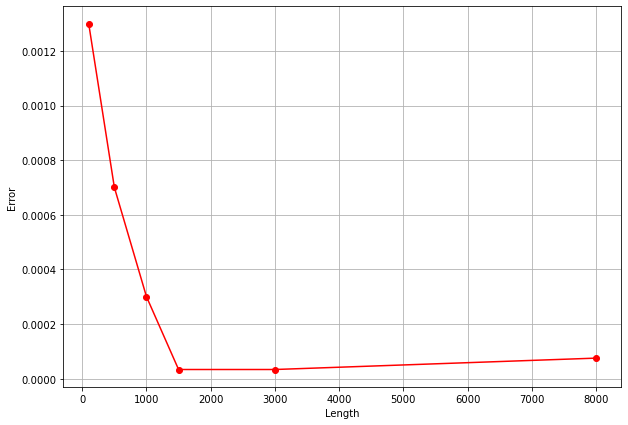

In [9]:
Plotter(len_n)